In [17]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]
train_directory='/Users/siddi/Desktop/BSC/train'
test_directory='/Users/siddi/Desktop/BSC/test'
val_directory='/Users/siddi/Desktop/BSC/valid'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('/Users/siddi/Desktop/BSC/train/*')
len(folders)

50

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 7261 images belonging to 50 classes.
Found 250 images belonging to 50 classes.


In [12]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=1,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-12-e3c272f0cf54>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,validation_data=test_set,epochs=1,steps_per_epoch=len(training_set),validation_steps=len(test_set))


227/227 [==============================] - 698s 3s/step - loss: 1.2080 - accuracy: 0.6779 - val_loss: 1.0497 - val_accuracy: 0.7680


In [13]:
model.save('BSC.h5')

In [14]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BSC.h5',compile=False)

In [15]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [16]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'AMERICAN AVOCET'

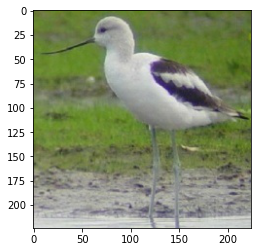

In [20]:
img='/Users/siddi/BSC/test images/5.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

'AMERICAN PIPIT'

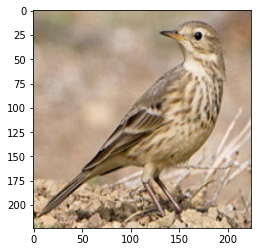

In [21]:
img='/Users/siddi/Desktop/BSC/test images/10.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

'ARARIPE MANAKIN'

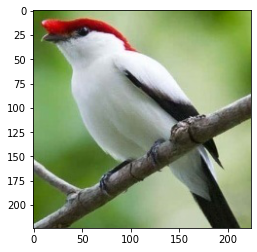

In [22]:
img='/Users/siddi/Desktop/BSC/test images/15.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

'BLACK FRANCOLIN'

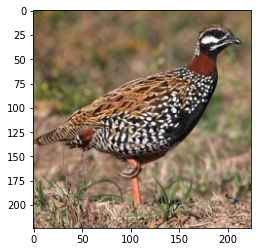

In [23]:
img='/Users/siddi/Desktop/BSC/test images/35.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)